In [1]:
#!pip install librosa
from pathlib import Path
import os
import pandas as pd
import librosa
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, sosfiltfilt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
#constants
SR = 22050

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive

Mounted at /content/drive
 apartments.gsheet   image.gsheet   Old_dl_colab_notebooks
'Colab Notebooks'    NII_project    tiny-imagenet-200.zip


## PCA
n_components: either automatic, or with 12 (because we have 12 pitches)

In [16]:
#chromagrams_array = np.array(chromagrams)
#print(chromagrams[0].shape)
#print(chromagrams_array.shape)

#x = pca.fit_transform(chromagrams_array)

#pca_chromagrams = chromagrams_array.apply(lambda x: pca.fit_transform(x))
import cv2
from tqdm.notebook import tqdm

'''pca_chromagrams = []
for x in chromagrams:
    res = PCA().fit_transform(x)
    res = res.reshape(res.shape[0]*res.shape[1])
    pca_chromagrams.append(res)'''

path = "/content/drive/MyDrive/Colab Notebooks/aiti_project/dataset/chromagrams3/"
image_names = os.listdir(path)
n_chroma = len(image_names)

pca_chromagrams = []

for i in tqdm(Hil ):
  x = cv2.imread(path+i, cv2.IMREAD_GRAYSCALE)/255
  res = PCA().fit_transform(x)
  res = res.reshape(res.shape[0]*res.shape[1])
  pca_chromagrams.append(res)

#print(pca_chromagrams.shape)

  0%|          | 0/5287 [00:00<?, ?it/s]

In [18]:
#chromagrams_array[0, :, :]

## Kmeans Clustering

In [19]:
'''squared_distances = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit_transform(pca_chromagrams)
    squared_distances.append(km.inertia_)'''

#clusters = KMeans(n_clusters=8, max_iter=10, random_state=0).fit_transform(pca_chromagrams)
#print(clusters)

cluster_number = range(2,120) #120-240

distortions = []
silhouette_scores = []
for n in cluster_number:
    estimator = KMeans(n_clusters = n, init='k-means++', n_init=10, max_iter=300)
    y = estimator.fit_predict(pca_chromagrams) #y of predictions
    distortions.append(estimator.inertia_)
    silhouette_scores.append(silhouette_score(pca_chromagrams,y))

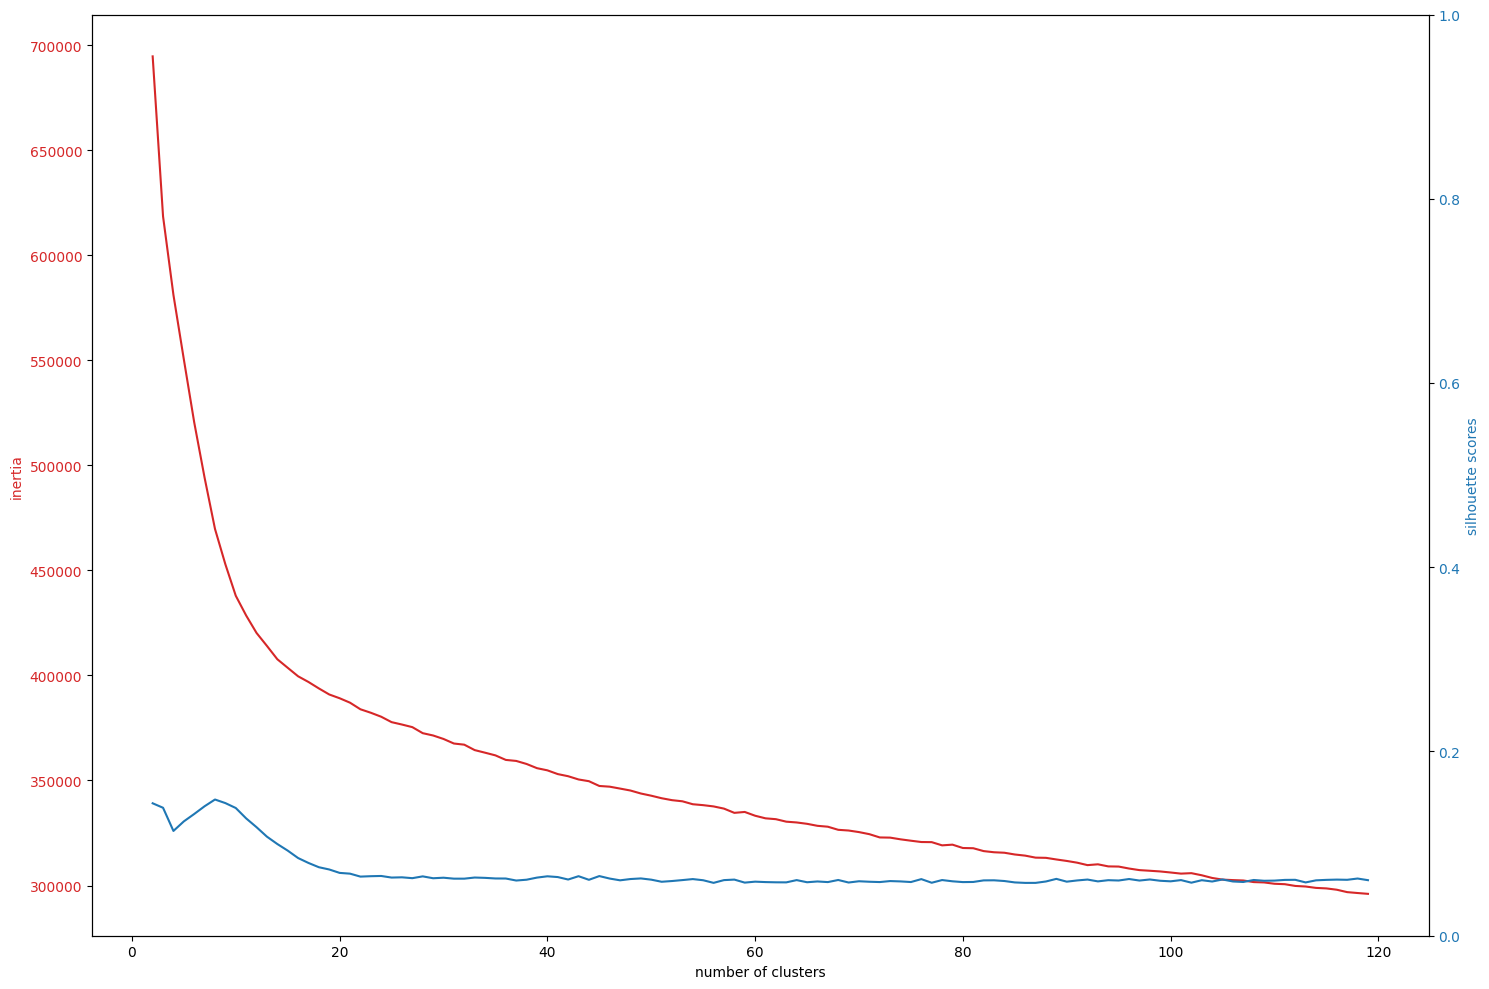

In [20]:
# Create some mock data
t = cluster_number
data1 = distortions
data2 = silhouette_scores

fig, ax1 = plt.subplots(figsize = (15, 10))
          
color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('inertia', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

FOR KMEANS CLUSTERING:
compute the predictions:   cluster_predictions = kmeans.fit_predict(x)
find an evaluation method he uses silhouette score

In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def plot_clusters(X, y, dim, points=None,
                  labels_prefix = 'cluster', 
                  points_name = 'centroids',
                  colors = cm.tab10, # a qualitative map 
                      # https://matplotlib.org/examples/color/colormaps_reference.html
#                   colors = ['brown', 'orange', 'olive', 
#                             'green', 'cyan', 'blue', 
#                             'purple', 'pink'],
#                   points_color = 'red'
                  points_color = cm.tab10(10), # by default the last of the map (to be improved)
                  dbscan = False):
    """
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points
    """
    # plot the labelled (colored) dataset and the points
    labels = np.unique(y)
    for i in range(len(labels)):
        color = colors(i / len(labels)) # choose a color from the map
        plt.scatter(X[y==labels[i],dim[0]], 
                    X[y==labels[i],dim[1]], 
                    s=10, 
                    c = [color], # scatter requires a sequence of colors
                    marker='s', 
                    label=labels_prefix+str(labels[i]))
    if dbscan == False:
        plt.scatter(points[:,dim[0]], points[:,dim[1]], s=50, marker='*', c=[points_color], label=points_name)
    plt.legend()
    plt.grid()
    plt.show() 

In [22]:
X = np.array(pca_chromagrams)
print("size of the chromagram list", X[0].shape,"number of points in each chromagrams", X[1].shape)

size of the chromagram list (144,) number of points in each chromagrams (144,)


In [23]:
# to fill
good_k = 15

estimator = KMeans(n_clusters = good_k, init='k-means++', n_init=10, max_iter=300,)
y = estimator.fit_predict(X)

#estimator.cluster_centers_

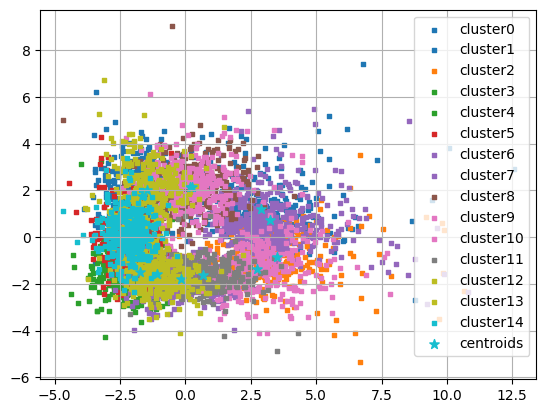

In [24]:
plot_clusters(X, y, dim= (0,1), points= estimator.cluster_centers_)
              #, ['cluster0', 'cluster1', 'cluster2'], ['centroids'],
             #['blue', 'red', 'pink'], ['cyan'])

## DBSCAN

In [25]:
from sklearn.cluster import DBSCAN

#definition of the dbscan model
db_model = DBSCAN(eps=0.05, min_samples=10) 
y_pred = db_model.fit_predict(pca_chromagrams) #dbscan predictions

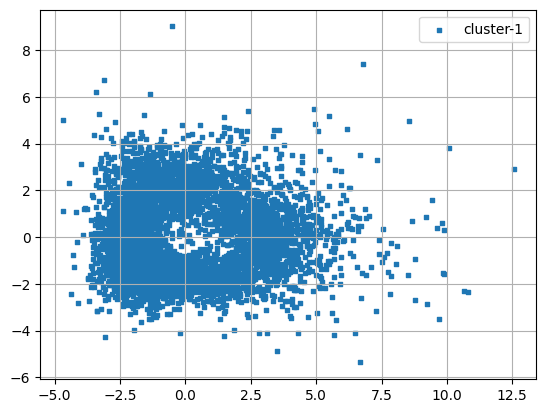

In [26]:
plot_clusters(X, y_pred, dim= (0,1), dbscan = True)